In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
data = pd.read_csv('final_data.csv')
data.head()

,No,a (Å),delta,Tm (K),D_Tm (K),Hmix (kJ/mol),σHmix (kJ/mol),Sid (kJ/mol),Elec_nega,D_elec_nega,...,AMp,SSsp,FCCp,B2p,BCCp,HCPp,2BCCp,SSp,L12p,2FCCp
0,2,1.544000,0.051293,1134.443333,142.109607,-3.555556,0.209513,0.636514,1.823333,0.150849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.580308,0.009851,840.646923,311.708141,-1.893491,0.051817,0.666278,1.782308,0.116761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.475200,0.069075,675.718000,456.594686,-4.800000,0.097980,0.673012,1.858000,0.058788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1.548000,0.058183,1001.925000,403.576498,-3.750000,0.541266,0.562335,1.900000,0.051962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1.600750,0.000271,1000.982500,135.069652,-7.500000,1.082532,0.562335,1.465000,0.268468,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
cols = np.array(data.columns)
cols.shape

(105,)

In [28]:
data.isna().sum().sum()

0

In [29]:
from sklearn.preprocessing import normalize

X, Y = data[[c for c in cols if c not in ['BulkModulus (GPa)', 'D_Bulk (GPa)']]], data[['BulkModulus (GPa)', 'D_Bulk (GPa)']]

X = normalize(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
np.sum(np.isnan(X_train))

0

In [31]:
np.sum(np.isnan(X_train))

0

In [32]:
X_test.shape

(221, 103)

In [17]:
#Scaling numerical features
#cols = np.array(X_train.columns)
#cols_to_scale = np.delete(cols, np.where(cols=='pin_material'))

#scaler = StandardScaler()
#X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[cols]), columns=cols)
#X_train[cols] = X_train_scaled

#X_test_scaled = pd.DataFrame(scaler.transform(X_test[cols]), columns=cols)
#X_test[cols] = X_test_scaled

In [18]:
print(X_train)

[[2.59161610e-03 6.26316415e-04 4.21117790e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.72963629e-03 8.25584226e-04 6.36822644e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.63318295e-03 7.53931691e-04 6.56696203e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.99956655e-03 7.36051379e-04 3.38335945e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.66199714e-03 8.45157924e-04 4.00927381e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.19373608e-03 6.93945620e-04 3.59686082e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [19]:
Y_test


,BulkModulus (GPa),D_Bulk (GPa)
309,159.939394,27.340656
1041,150.461538,32.193204
381,61.350000,33.919427
497,143.200000,42.531870
551,121.200000,33.552347
...,...,...
1057,157.966102,28.533635
321,66.800000,59.713985
982,128.571429,57.676084
924,143.241379,33.517525


In [20]:
nn_model = MLPRegressor(activation='logistic', alpha=0.01, batch_size = 2, max_iter=8000, random_state=42)
nn_model.fit(X_train, Y_train)

Y_pred_nn = nn_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_nn)
test_mae = mean_absolute_error(Y_test, Y_pred_nn)
print("NN MSE: %.2f" %(test_mse))
print("NN MAE: %.2f" %(test_mae))
print("NN RMSE: %.2f" %(np.sqrt(test_mse)))

NN MSE: 769.58
NN MAE: 20.15
NN RMSE: 27.74


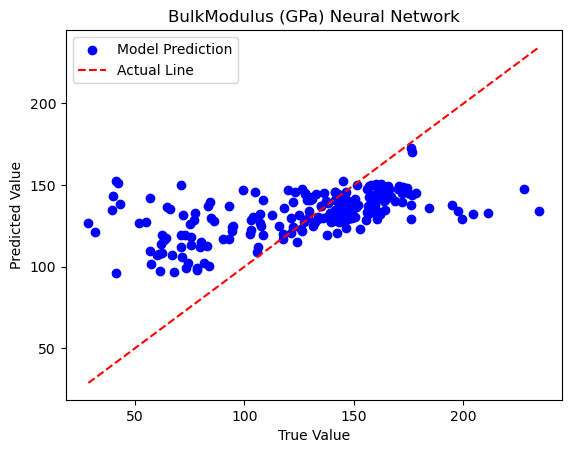

In [21]:
plt.scatter(Y_test['BulkModulus (GPa)'], [a[0] for a in Y_pred_nn], color='blue', label='Model Prediction')
plt.plot([min(Y_test['BulkModulus (GPa)']), max(Y_test['BulkModulus (GPa)'])], [min(Y_test['BulkModulus (GPa)']), max(Y_test['BulkModulus (GPa)'])], color='red', linestyle='--', label='Actual Line')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('BulkModulus (GPa) - Neural Network')
plt.legend()
plt.show()

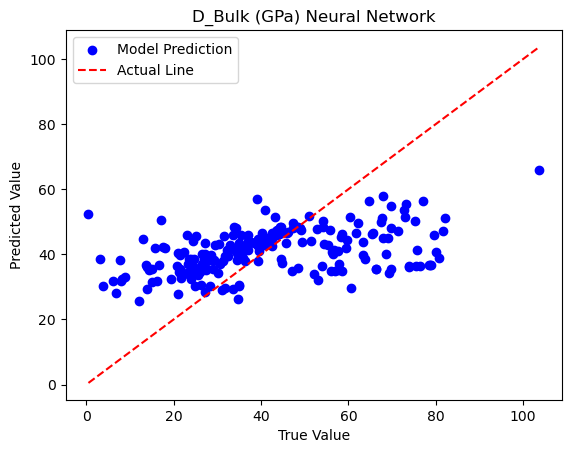

In [22]:
plt.scatter(Y_test['D_Bulk (GPa)'], [a[1] for a in Y_pred_nn], color='blue', label='Model Prediction')
plt.plot([min(Y_test['D_Bulk (GPa)']), max(Y_test['D_Bulk (GPa)'])], [min(Y_test['D_Bulk (GPa)']), max(Y_test['D_Bulk (GPa)'])], color='red', linestyle='--', label = 'Actual Line')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('D_Bulk (GPa) Neural Network')
plt.legend()
plt.show()